# Машинное обучение, ШАД
## Лабораторная работа 3. Линейные модели классификации и регрессии, валидация моделей.


**Правила:**

* Выполненную работу нужно отправить в соответствующее задание в личном кабинете
* Дедлайн **10 октября 15:00**. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Для сдачи задания нужно загрузить **ноутбук в формате `ipynb`** в ЛМС.
* Выполнять задание необходимо полностью самостоятельно.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Присылайте понятный и читаемый код. Если код не будет понятен проверяющему, оценка может быть снижена.
* Код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*


**Правила оформления теоретических задач:**

* Решения необходимо прислать одним из следующих способов:
  * фотографией в правильной ориентации, где все четко видно, а почерк разборчив,
    * прикрепив ее в ЛМС в форматах `pdf`, `png` или `jpg` *или*
    * вставив ее в ноутбук посредством `Edit -> Insert Image`;
  * в виде $\LaTeX$ в markdown-ячейках или в отдельном `pdf`-файле.
* Решения не проверяются, если какое-то требование не выполнено. Особенно внимательно все проверьте в случае выбора второго пункта (вставки фото в ноутбук). <font color="red"><b>Неправильно вставленные фотографии могут не передаться при отправке.</b></font> Для проверки попробуйте переместить `ipynb` в другую папку и открыть его там.
* В решениях поясняйте, чем вы пользуетесь, хотя бы кратко. Например, если пользуетесь независимостью, то достаточно подписи вида "*X и Y незав.*"
* Решение, в котором есть только ответ, и отсутствуют вычисления, оценивается в 0 баллов.

**Баллы за задание:**

* Задача 1 &mdash; 1 балл;
* Задача 2 &mdash; 1 балл;
* Задача 3 &mdash; 1 балл;
* Задача 4 &mdash; 1 балл;
* Задача 5 &mdash; 5 баллов.

----

---
### Задача 1. 

1. Пусть $X_1,...,X_n$ &mdash; выборка из гамма-распределения с плотностью $p_\theta(x) = \frac{\theta^\beta}{\Gamma(\beta)} x^{\beta-1} e^{-\theta x}$, где $\theta>0, \beta>0, x>0$, причем $\beta$ известно. Найдите оценку максимального правдоподобия параметра $\theta$.

2. Пусть $X_1,...,X_n$ &mdash; выборка из пуассоновского распределения, для которого $\mathsf{P}_\theta(X_i = k) = \frac{\theta^k}{k!}e^{-\theta}$, где $\theta>0, k \in \mathbb{Z}_+ = \{0, 1, 2, ...\}$. Найдите оценку максимального правдоподобия параметра $\theta$.

#### Решение задачи 1
**1 Найти оценку максимального правдоподобия $\theta$ для гамма распределения с плотностью:**  

$$p_\theta(x) = \frac{\theta^\beta}{\Gamma(\beta)} x^{\beta-1} e^{-\theta x}$$

1) Для выборки из 𝑛 независимых и идентично распределённых (i.i.d.) случайных величин функция правдоподобия 𝐿(𝜃) будет равна произведению плотностей:

$$L(\theta) = \prod_{i=1}^{n} p_\theta(X_i) = \prod_{i=1}^{n} \left( \frac{\theta^\beta}{\Gamma(\beta)} X_i^{\beta-1} e^{-\theta X_i} \right)$$

2) Упростим это выражение:

$$L(\theta) = \frac{\theta^{n\beta}}{(\Gamma(\beta))^n} \prod_{i=1}^{n} X_i^{\beta-1} e^{-\theta \sum_{i=1}^{n} X_i}$$

3) Прологорифмируем:

$$\log L(\theta) = n\beta \log \theta - n \log \Gamma(\beta) + (\beta-1) \sum_{i=1}^{n} \log X_i - \theta \sum_{i=1}^{n} X_i$$

4) Для нахождения максимума, найдем производную логарифма функции правдоподобия по 𝜃 и приравняем её к нулю:
$$\frac{d}{d\theta} \log L(\theta) = \frac{n\beta}{\theta} - \sum_{i=1}^{n} X_i = 0$$

5) Решим уравнение и найдём оценку максимального правдоподобия: 
$$\hat{\theta} = \frac{n\beta}{\sum_{i=1}^{n} X_i}$$


**2 Найти оценку максимального правдоподобия $\theta$ для пуассоновского распределения с плотностью:**

$$\mathsf{P}_\theta(X_i = k) = \frac{\theta^k}{k!}e^{-\theta}$$ 
$$где$$ 
$$\theta>0, k \in \mathbb{Z}_+ = \{0, 1, 2, ...\}$$

1) Для выборки функция правдоподобия будет равна произведению вероятностей:

$$L(\theta) = \prod_{i=1}^{n} \frac{\theta^{X_i}}{X_i!} e^{-\theta}$$

2) Перепишем функцию правдоподобия:

$$L(\theta) = \left( \prod_{i=1}^{n} \frac{1}{X_i!} \right) \theta^{\sum_{i=1}^{n} X_i} e^{-n\theta}$$

3) Прологарифмируем: 

$$\log L(\theta) = \log \left( \prod_{i=1}^{n} \frac{1}{X_i!} \right) + \left( \sum_{i=1}^{n} X_i \right) \log \theta - n\theta$$

4) Заметим что первое слагаемое не зависит от $\theta$, поэтому отбросим его:

$$\log L(\theta) = \left( \sum_{i=1}^{n} X_i \right) \log \theta - n\theta$$

5) найдём производную логарифма функции правдоподобия по 𝜃 и приравняем её к нулю:

$$\frac{d}{d\theta} \log L(\theta) = \frac{\sum_{i=1}^{n} X_i}{\theta} - n = 0$$

6) Решим это уравнение относительно 𝜃:

$$\theta = \frac{\sum_{i=1}^{n} X_i}{n} = \bar{X}$$

Таким образом, оценка максимального правдоподобия параметра 𝜃 для пуассоновского распределения равна выборочному среднему:

$$\hat{\theta} = \bar{X}$$

---
### Задача 2.

Пусть $\ell_Y(\theta)$ &mdash; логарифмическая функция правдоподобия в модели логистической регрессии, задачу максимизации которой мы рассматривали на лекции. Добавим к ней $L_2$-регуляризатор и будем рассматривать задачу
$$F(\theta) = -\ell_Y(\theta) + \lambda \|\theta\|^2  \longrightarrow \min_{\theta \in \mathbb{R}^d},$$
где $\lambda > 0$ &mdash; коэффициент регуляризации.

1. Выпишите формулы градиентного спуска (GD) и стохастического градиентного спуска (SGD).

2. Покажите, что $F(\theta)$ &mdash; выпуклая функция по $\theta$ и, как следствие, имеет единственный экстремум, являющийся глобальным максимумом. *Указание*. Посчитайте гессиан (матрицу вторых производных) и покажите, что она положительно определена.

3. Опишите, как может вести себя решение при отсутствии регуляризации, то есть при $\lambda = 0$


### Решение задачи 2
**1 Выпишите формулы градиентного спуска (GD) и стохастического градиентного спуска (SGD)**
1) Градиент функции потерь: 
$$\nabla F(\theta) = -\nabla \ell_Y(\theta) + 2\lambda \theta$$
2) Формула обновления параметров:
$$\theta^{(t+1)} = \theta^{(t)} - \eta \left( -\nabla \ell_Y(\theta^{(t)}) + 2\lambda \theta^{(t)} \right)$$
3) Стохастический градиентный спуск, градиент функции потерь для одного объекта:
$$\nabla F(\theta; x_i, y_i) = - \nabla \ell_Y(\theta; x_i, y_i) + 2\lambda \theta$$
4) Формула обновления параметров для СГД
$$\theta^{(t+1)} = \theta^{(t)} - \eta \left( - \nabla \ell_Y(\theta^{(t)}; x_i, y_i) + 2\lambda \theta^{(t)} \right)$$





**2 Показательство выпуклости и наличия минимума**

1) Градиент функции логарифма правдоподобия:
$$\nabla^2 \ell_Y(\theta) = \sum_{i=1}^n p_\theta(x_i) (1 - p_\theta(x_i)) x_i x_i^T$$

2) Вероятность, которую выдает модель логистической регрессии:
$$p_\theta(x_i) = \frac{1}{1 + e^{-\theta^T x_i}}$$

3) Градиент регуляризатора:
$$\nabla (\lambda \|\theta\|^2) = 2\lambda \theta$$

4) Гессиан регуляризатора:
$$\nabla^2 (\lambda \|\theta\|^2) = 2\lambda I$$
где 𝐼 — единичная матрица размерности 𝑑×𝑑.

5) Полный гессиан функции будет равен:
$$\nabla^2 F(\theta) = -\nabla^2 \ell_Y(\theta) + 2\lambda I$$
Так как $\nabla^2 \ell_Y(\theta)$ - положительно полуопределённая матрица, то $-\nabla^2 \ell_Y(\theta)$ будет отрицательно полуопределённой. 
Однако добавление регуляризатора 2𝜆𝐼, где 𝜆>0, гарантирует, что матрица $\nabla^2F(\theta)$ будет положительно определённой, так как матрица 2𝜆𝐼 добавляет положительное значение на диагонали.

6) Это означает, что для любого ненулевого вектора 𝑣:
$$v^T \nabla^2 F(\theta) v > 0$$
Следовательно, функция 
𝐹(𝜃) выпукла.

7) Так как функция выпукла и гессиан положительно определён, то функция достигнет изолированного минимума.




**3 Что может быть при отсутсвии регуляризации**
1) Может случиться переобучение
2) Могут быть нестабильные и неустойчивые решения.
    Если данные линейно разделимы, то логистическая регрессия может устремлять параметры 𝜃 до бесконечности для идеального разделения классов. 
3) Чувствительность к мультиколлинеарности.
    Если признаки скоррелированы, а шум у таргета большой, это может привести также к большим значениям параметра 𝜃, и решение будет считаться нестабильным.
4) Низкая обобщаяющая способность

---
### Задача 3.

Рассмотрим линейную регрессию $y(x) = x^T \theta$, причем для оценки $\theta$ будем рассматривать функцию потерь Хьюбера
$$R(x) = \frac{x^2}{2} I\{|x| \leqslant c\} + c\left(|x| - \frac{c}{2}\right)I\{|x| > c\}.$$

Тем самым задача оптимизации имеет вид
$$\sum_{i=1}^n R(Y_i + x_i^T \theta) \longrightarrow \min_{\theta \in \mathbb{R}^d}.$$

1. Нарисуйте график $R(x)$. В чем польза выбора такой функции потерь?

2. Выпишите формулы градиентного спуска (GD) и стохастического градиентного спуска (SGD).

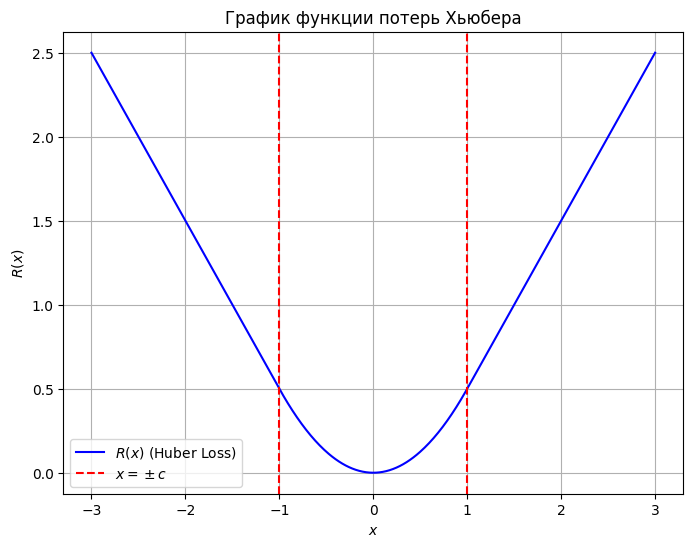

In [15]:
# Построение графика
import numpy as np
import matplotlib.pyplot as plt

# Параметр c для функции Хьюбера
c = 1

# Определение функции потерь Хьюбера
def huber_loss(x, c):
    return np.where(np.abs(x) <= c, 0.5 * x**2, c * (np.abs(x) - 0.5 * c))

# Создаем значения x для графика
x_vals = np.linspace(-3, 3, 500)

# Вычисляем значения функции Хьюбера
y_vals = huber_loss(x_vals, c)

plt.figure(figsize=(8, 6))
plt.plot(x_vals, y_vals, label=r'$R(x)$ (Huber Loss)', color='blue')
plt.axvline(x=-c, color='red', linestyle='--', label=r'$x = \pm c$')
plt.axvline(x=c, color='red', linestyle='--')
plt.title('График функции потерь Хьюбера')
plt.xlabel('$x$')
plt.ylabel('$R(x)$')
plt.legend()
plt.grid(True)
plt.show()


Формула градиентного спуска для функции Хьюбера:
$$θ^{(k+1)} = θ^{(k)} - \frac{η}{N} \sum_{i=1}^N ∇_θ R(Y_i + x_i^T θ)$$

Для стохастического градиентного спуска:
$$θ^{(k+1)} = θ^{(k)} - η ∇_θ R(Y_i + x_i^T θ)$$

где $η$ - шаг обучения  

---
### Задача 4.

В предыдущем домашнем задании вы подробно познакомились с линейными моделями, выяснили о необходимости обработки непрерывных и категориальных признаков, узнали о способах подбора гиперпараметров. Порассуждайте над следующими вопросами.

**1.** Какие побочные эффекты могут возникунуть при стандартизации (нормализации) признаков с помощью `StandardScaler`, `MinMaxScaler`? Что с этим можно сделать?

**2.** Рассмотрим пример с первого занятия про модель потребления мороженного от температуры:
$$ic=\theta_1 + \theta_2 t.$$
Предположим, что нам также известен еще один признак, отвечающий за год. Обозначим его за $y$. Пусть $y \in \{1, 2, 3\}$. Попробуем учесть влияние года двумя разными способами:
* Модель $ic = \theta_1 + \theta_2 t+ \theta_3 y_1 + \theta_4 y_2$, где $y_1 = I\{y=1\}$, $y_2 = I\{y=2\}$.
* Для каждого года рассматривается своя линейная зависимость $ic=\theta_1+\theta_2 t$.
  
Поясните, в чем различие этих двух подходов.

**3.** Визуализируйте совместные распределения вещественных признаков и целевой переменной для данных из предыдущего домашнего задания. Что можно сказать о зависимости таргета от признаков? Сделайте вывод о том, насколько хорошо построенные модели приближают истинные зависимости. 

Полученные графики приложите к решению теоретического задания.

---
### Задача 5.

Реализуйте логистическую регрессию с $L_2$ регуляризацией для поиска оценки параметров с помощью стохастического mini-batch градиентного спуска (SGD).

In [1]:
 
import numpy as np
from scipy.special import expit  

class LogisticRegression():
      
    def __init__(self, alpha=0, lr=0.5, max_iter=1e5, fit_intercept=True, batch_size=32):
        
        self.alpha = alpha
        self.lr = lr
        self.max_iter = int(max_iter)
        self.fit_intercept = fit_intercept
        self.batch_size = batch_size  
    
    @staticmethod
    def _sigmoid(x):
        
        return expit(x)  
    
    def _add_intercept(self, X):
      
        X_copy = np.full((X.shape[0], X.shape[1] + 1), fill_value=1.)
        X_copy[:, :-1] = X
        return X_copy
    
    def fit(self, X, Y):
      
        assert X.shape[0] == Y.shape[0]

        # Добавляем свободный коэффициент
        if self.fit_intercept:
            X = self._add_intercept(X)
        
        # Инициализируем параметры
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        
        for iteration in range(self.max_iter):
            
            indices = np.random.choice(n_samples, self.batch_size, replace=False)
            X_batch = X[indices]
            Y_batch = Y[indices]
            
            
            predictions = self._sigmoid(np.dot(X_batch, self.weights))
            
            
            gradient = np.dot(X_batch.T, predictions - Y_batch) / self.batch_size
            
            
            gradient += self.alpha * self.weights
            
            
            self.weights -= self.lr * gradient
        
        self.coef_ = self.weights[:-1] if self.fit_intercept else self.weights
        self.intercept_ = self.weights[-1] if self.fit_intercept else 0
        return self
    
    def predict(self, X):
        
        if self.fit_intercept:
            X = self._add_intercept(X)
        
        # Предсказываем вероятности и преобразуем их в классы
        probas = self._sigmoid(np.dot(X, self.weights))
        return np.where(probas >= 0.5, 1, 0)
    
    def predict_proba(self, X):
       
        if self.fit_intercept:
            X = self._add_intercept(X)
        
        # Предсказываем вероятности классов
        probas = self._sigmoid(np.dot(X, self.weights))
        return np.vstack([1 - probas, probas]).T


Рассмотрим игрушечный датасет на $30$ признаков `load_breast_cancer` из библиотеки `sklearn`. Это относительно простой для бинарной классификации датасет по диагностике рака молочной железы.

Ради интереса можно прочитать описание признаков.

In [2]:
from sklearn.datasets import load_breast_cancer
dataset = load_breast_cancer()
dataset['DESCR'].split('\n')[11:31]

[':Attribute Information:',
 '    - radius (mean of distances from center to points on the perimeter)',
 '    - texture (standard deviation of gray-scale values)',
 '    - perimeter',
 '    - area',
 '    - smoothness (local variation in radius lengths)',
 '    - compactness (perimeter^2 / area - 1.0)',
 '    - concavity (severity of concave portions of the contour)',
 '    - concave points (number of concave portions of the contour)',
 '    - symmetry',
 '    - fractal dimension ("coastline approximation" - 1)',
 '',
 '    The mean, standard error, and "worst" or largest (mean of the three',
 '    worst/largest values) of these features were computed for each image,',
 '    resulting in 30 features.  For instance, field 0 is Mean Radius, field',
 '    10 is Radius SE, field 20 is Worst Radius.',
 '',
 '    - class:',
 '            - WDBC-Malignant',
 '            - WDBC-Benign']

Разделим нашу выборку на обучающую и тестовую:

In [3]:
from sklearn.model_selection import train_test_split
X, Y = dataset['data'], dataset['target']

X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.2, random_state=42
)
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((455, 30), (114, 30), (455,), (114,))

При использовании регуляризации данные необходимо нормализовать. Воспользуемся для этого классом `StandardScaler` из библиотеки `sklearn`. 

In [4]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Теперь обучите модель логистической регрессии.

In [5]:
model = LogisticRegression(lr=0.1, max_iter=10000,alpha=1)
model.fit(X_train_scaled, Y_train)
y_pred = model.predict(X_test_scaled)

На занятии обсуждали, что в нашей постановке задачи при сравнении выиграет модель с меньшим FN, ведь каждая не обнаруженная опухоль может стоить человеческой жизни. Чем меньше ложно отрицательных срабатываний, тем выше Recall модели, а значит разумно взять Recall в качестве целевой метрики. 

Построить модель с Recall = 1 довольно просто (Как?), но в ней не будет большого смысла, т.к., например, для нашей задачи отправление на доп. обследование может стоить дополнительных средств и времени специалистов, поэтому хотелось, чтобы наша модель имела неплохую точность. Какую метрику можно использовать, чтобы учесть и точность, и полноту?

<...>

Выберите и посчитайте целевые метрики для нашей задачи.

In [6]:
from sklearn.metrics import precision_recall_fscore_support, accuracy_score, confusion_matrix, roc_auc_score, classification_report

print(classification_report(Y_test, y_pred))


              precision    recall  f1-score   support

           0       0.95      0.98      0.97        43
           1       0.99      0.97      0.98        71

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



In [7]:
from sklearn.metrics import balanced_accuracy_score

print(balanced_accuracy_score(Y_test, y_pred))

0.9742875859810023


Рассмотрите как влияет размер шага (`learning rate`) на качество модели. Обучите каждую модель одинаковое число итераций (например, 10000), а затем посчитайте качество. Сделайте выводы.

C:\Users\1\AppData\Local\Temp\ipykernel_21668\2783604196.py:73: RuntimeWarning: overflow encountered in multiply
  self.weights -= self.lr * gradient
C:\Users\1\AppData\Local\Temp\ipykernel_21668\2783604196.py:73: RuntimeWarning: overflow encountered in multiply
  self.weights -= self.lr * gradient


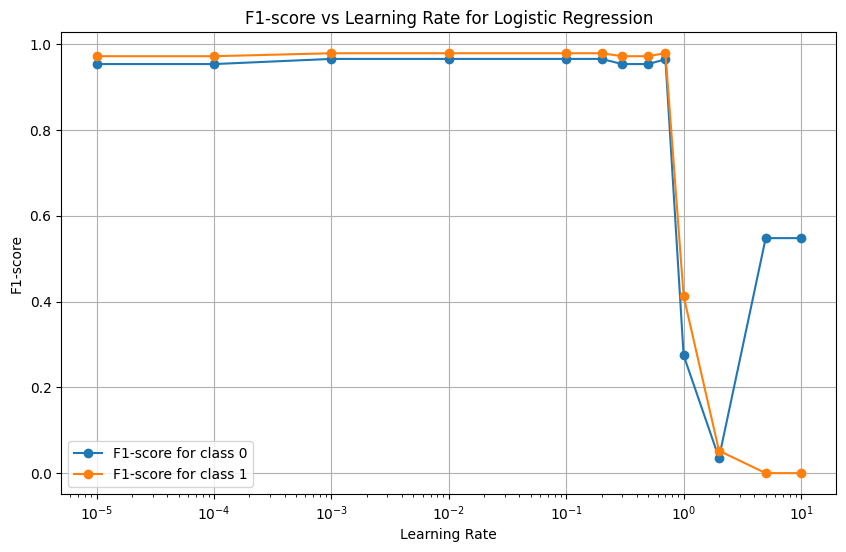

In [25]:
# График влияния размера шага на показатель метрики
from sklearn.metrics import f1_score
lrs = [1e-5, 1e-4, 1e-3, 1e-2, 0.1, 0.2, 0.3, 0.5, 0.7, 1, 2, 5, 10]

f1_class_0 = []
f1_class_1 = []


for lr in lrs:
    
    model = LogisticRegression(max_iter=10000, alpha=1, lr=lr)

    model.fit(X_train_scaled, Y_train)
   
    y_pred = model.predict(X_test_scaled)
    
    f1_0 = f1_score(Y_test, y_pred, pos_label=0)
    f1_1 = f1_score(Y_test, y_pred, pos_label=1)
    
    f1_class_0.append(f1_0)
    f1_class_1.append(f1_1)

# Построение графиков
plt.figure(figsize=(10, 6))
plt.plot(lrs, f1_class_0, label='F1-score for class 0', marker='o')
plt.plot(lrs, f1_class_1, label='F1-score for class 1', marker='o')

plt.xscale('log')  
plt.xlabel('Learning Rate')
plt.ylabel('F1-score')
plt.title('F1-score vs Learning Rate for Logistic Regression')
plt.legend()
plt.grid(True)

plt.show()

Как только шаг приближается к 1 качество обучения начинает падать, а после перехода через 1 вообще рушиться. По графику оптимальное значение это 0.1

---
Рассмотрите несколько моделей, в которых установите не менее 5-ти различных коэффициентов регуляризации, а также модель без регуляризатора. Сравните, влияет ли наличие регуляризации на качество, сделайте выводы. Под качеством подразумевается значение какой-либо выбранной вами метрики качества классификации.

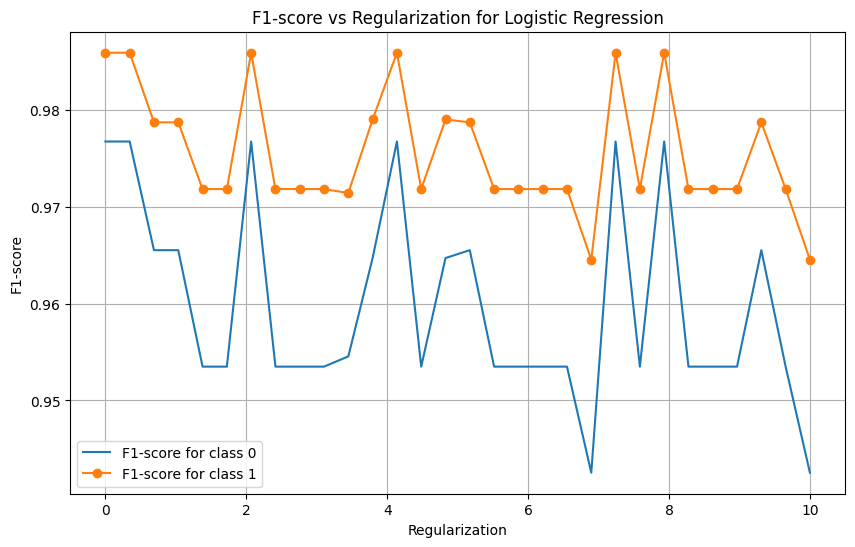

In [31]:
from sklearn.metrics import f1_score
import numpy as np
import matplotlib.pyplot as plt
alpha_list = np.linspace(0, 10, 30)

f1_class_0 = []
f1_class_1 = []


for alpha in alpha_list:
    
    model = LogisticRegression(max_iter=10000, alpha=alpha, lr=0.1)

    model.fit(X_train_scaled, Y_train)

    y_pred = model.predict(X_test_scaled)

    f1_0 = f1_score(Y_test, y_pred, pos_label=0)
    f1_1 = f1_score(Y_test, y_pred, pos_label=1)

    f1_class_0.append(f1_0)
    f1_class_1.append(f1_1)


# Построение графиков
plt.figure(figsize=(10, 6))
plt.plot(alpha_list, f1_class_0, label='F1-score for class 0')
plt.plot(alpha_list, f1_class_1, label='F1-score for class 1', marker='o')

plt.xlabel('Regularization')
plt.ylabel('F1-score')
plt.title('F1-score vs Regularization for Logistic Regression')
plt.legend()
plt.grid(True)

plt.show()

Судя по графику без регуляризации сравнительно лучше, чем с некоторыми (большинством) коэффициентов

Выберите наилучшее значение коэффициента регуляризации с помощью кросс-валидации для двух подходов &mdash; `KFold` и `ShuffleSplit`. Используйте пять фолдов/разбиений.

In [12]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold, ShuffleSplit, cross_val_score
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler

# Список значений alpha (коэффициент регуляризации)
alpha_list = [1e-5, 1e-4, 1e-3, 1e-2, 0.1, 0.2, 0.3, 0.5, 0.7, 1, 2, 5, 10]

kf = KFold(n_splits=5, shuffle=True, random_state=42)

ss = ShuffleSplit(n_splits=5, test_size=0.2, random_state=42)

# Словарь для хранения лучших оценок по каждому методу
best_alpha = {}
best_score = {}

# Функция для поиска наилучшего alpha по кросс-валидации
def find_best_alpha(cv, method_name):
    best_alpha[method_name] = None
    best_score[method_name] = -np.inf

    for alpha in alpha_list:
        model = LogisticRegression(C=1/alpha, solver='liblinear', max_iter=10000)
        scores = cross_val_score(model, X_train_scaled, Y_train, cv=cv, scoring='f1')
        mean_score = np.mean(scores)
        # Если текущий результат лучше предыдущего, сохраняем его
        if mean_score > best_score[method_name]:
            best_score[method_name] = mean_score
            best_alpha[method_name] = alpha

# Поиск лучших alpha для KFold и ShuffleSplit
find_best_alpha(kf, 'KFold')
find_best_alpha(ss, 'ShuffleSplit')

print(f"Лучший alpha для KFold: {best_alpha['KFold']} с F1-score: {best_score['KFold']}")
print(f"Лучший alpha для ShuffleSplit: {best_alpha['ShuffleSplit']} с F1-score: {best_score['ShuffleSplit']}")


Лучший alpha для KFold: 10 с F1-score: 0.9828395900802768
Лучший alpha для ShuffleSplit: 2 с F1-score: 0.9805241621031093


Для выбранного значения коэффициента регуляризации оцените дисперсию усредненного значения метрики качества на тестовых батчах. Для этого выполните кросс-валидацию достаточно много раз (не менее 100) и посчитайте выборочную дисперсию. Обратите внимание, что для стратегии `KFold` нужно на каждой итерации перемешивать данные, для этого можно указать `shuffle=True`.

Сравните эти две стратегии кросс-валидации. Какие их преимущества и недостатки?

In [14]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold, ShuffleSplit, cross_val_score
from sklearn.metrics import f1_score
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler

# Параметры
alpha = 0.1  
n_repeats = 100 
cv_folds = 5  

model = LogisticRegression(C=1/alpha, max_iter=10000)

kf_f1_scores = []
ss_f1_scores = []

kf = KFold(n_splits=cv_folds, shuffle=True, random_state=42)

ss = ShuffleSplit(n_splits=cv_folds, test_size=0.2, random_state=42)

# Повторяем кросс-валидацию n_repeats раз
for _ in range(n_repeats):
    kf_scores = cross_val_score(model, X_train_scaled, Y_train, cv=kf, scoring='f1')
    kf_f1_scores.append(np.mean(kf_scores))
    
    ss_scores = cross_val_score(model, X_train_scaled, Y_train, cv=ss, scoring='f1')
    ss_f1_scores.append(np.mean(ss_scores))

# Рассчитываем дисперсии для обоих подходов
kf_variance = np.var(kf_f1_scores)
ss_variance = np.var(ss_f1_scores)

# Вывод результатов
print(f"KFold F1-score дисперсия: {kf_variance}")
print(f"ShuffleSplit F1-score дисперсия: {ss_variance}")


KFold F1-score дисперсия: 4.930380657631324e-32
ShuffleSplit F1-score дисперсия: 1.232595164407831e-32


**Вывод:** <...>

Эти результаты указывают, что дисперсия для метода ShuffleSplit немного ниже, чем для KFold, что может свидетельствовать о более устойчивой оценке метрики при использовании данной стратегии.

**KFold:**

Преимущества:
- Каждый образец используется для тестирования один раз, что уменьшает возможное смещение оценки метрики.
- Полезен для относительно небольших наборов данных, где важна стабилизация на каждом фолде.

Недостатки:
- Может занимать больше времени, так как требует𝑘-кратного повторения полного обучения модели.
- Сложнее настраивать долю тренировочных и тестовых данных, так как они фиксированы в соотношении 1/𝑘

**ShuffleSplit:**

Преимущества:
- Гибкость в отношении размера тестового и тренировочного наборов (например, можно задать test_size=0.2).
- Легко расширяется для большого числа повторений, поскольку каждый сплит выбирается независимо.

Недостатки:
- Возможно меньшее перекрытие между фолдами, что может привести к повышенной дисперсии метрики.
- Чаще используется для больших наборов данных, так как повторяющееся обучение модели по случайным подвыборкам может ускорить процесс

